Depression Dataset

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'student_depression.csv' with your actual file name and ensure it has proper column names
df = pd.read_csv(r'D:\Downloads\Depression.csv')

label_encoder = LabelEncoder()
# Automatically encode all categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,1,1,1,9,2,1,0
1,1,28,4.0,5.0,0,0,1,7,1,1,0
2,1,25,1.0,3.0,0,2,1,10,4,0,1
3,1,23,1.0,4.0,3,2,1,7,2,1,0
4,0,31,1.0,5.0,3,0,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,3,2,0,8,3,0,1
498,1,24,2.0,1.0,2,2,1,8,5,0,1
499,0,23,3.0,5.0,0,0,0,1,5,1,0
500,1,33,4.0,4.0,3,0,0,8,1,1,0


Corr Matrix

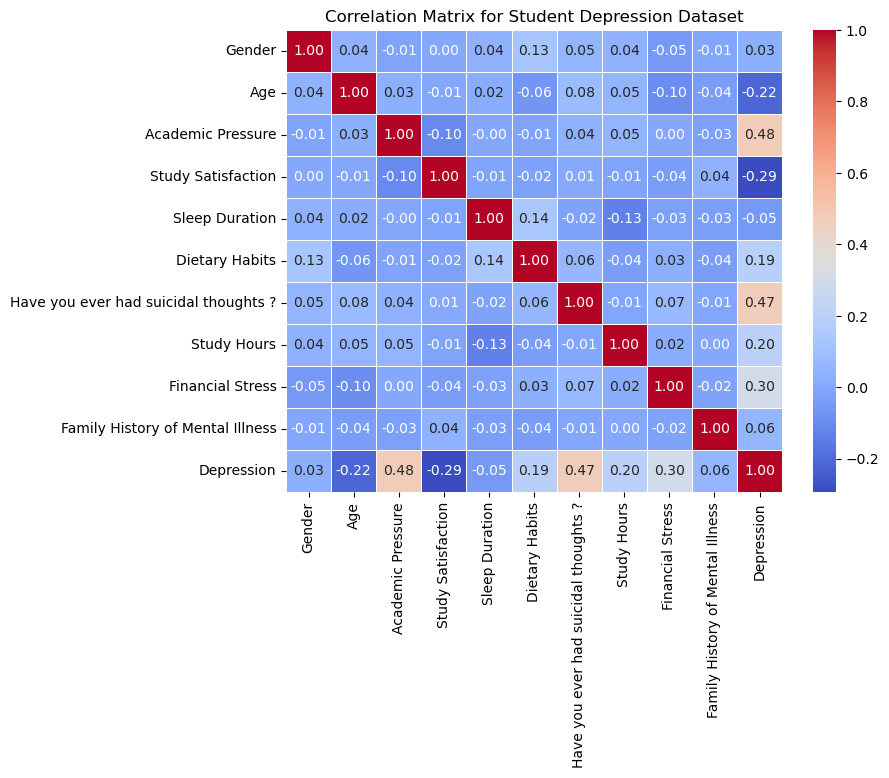

In [5]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Student Depression Dataset')
plt.show()

 Depression vs Features

C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\2606010509.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=feature, data=df, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\2606010509.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=feature, data=df, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\2606010509.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=feature, data=df, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykern

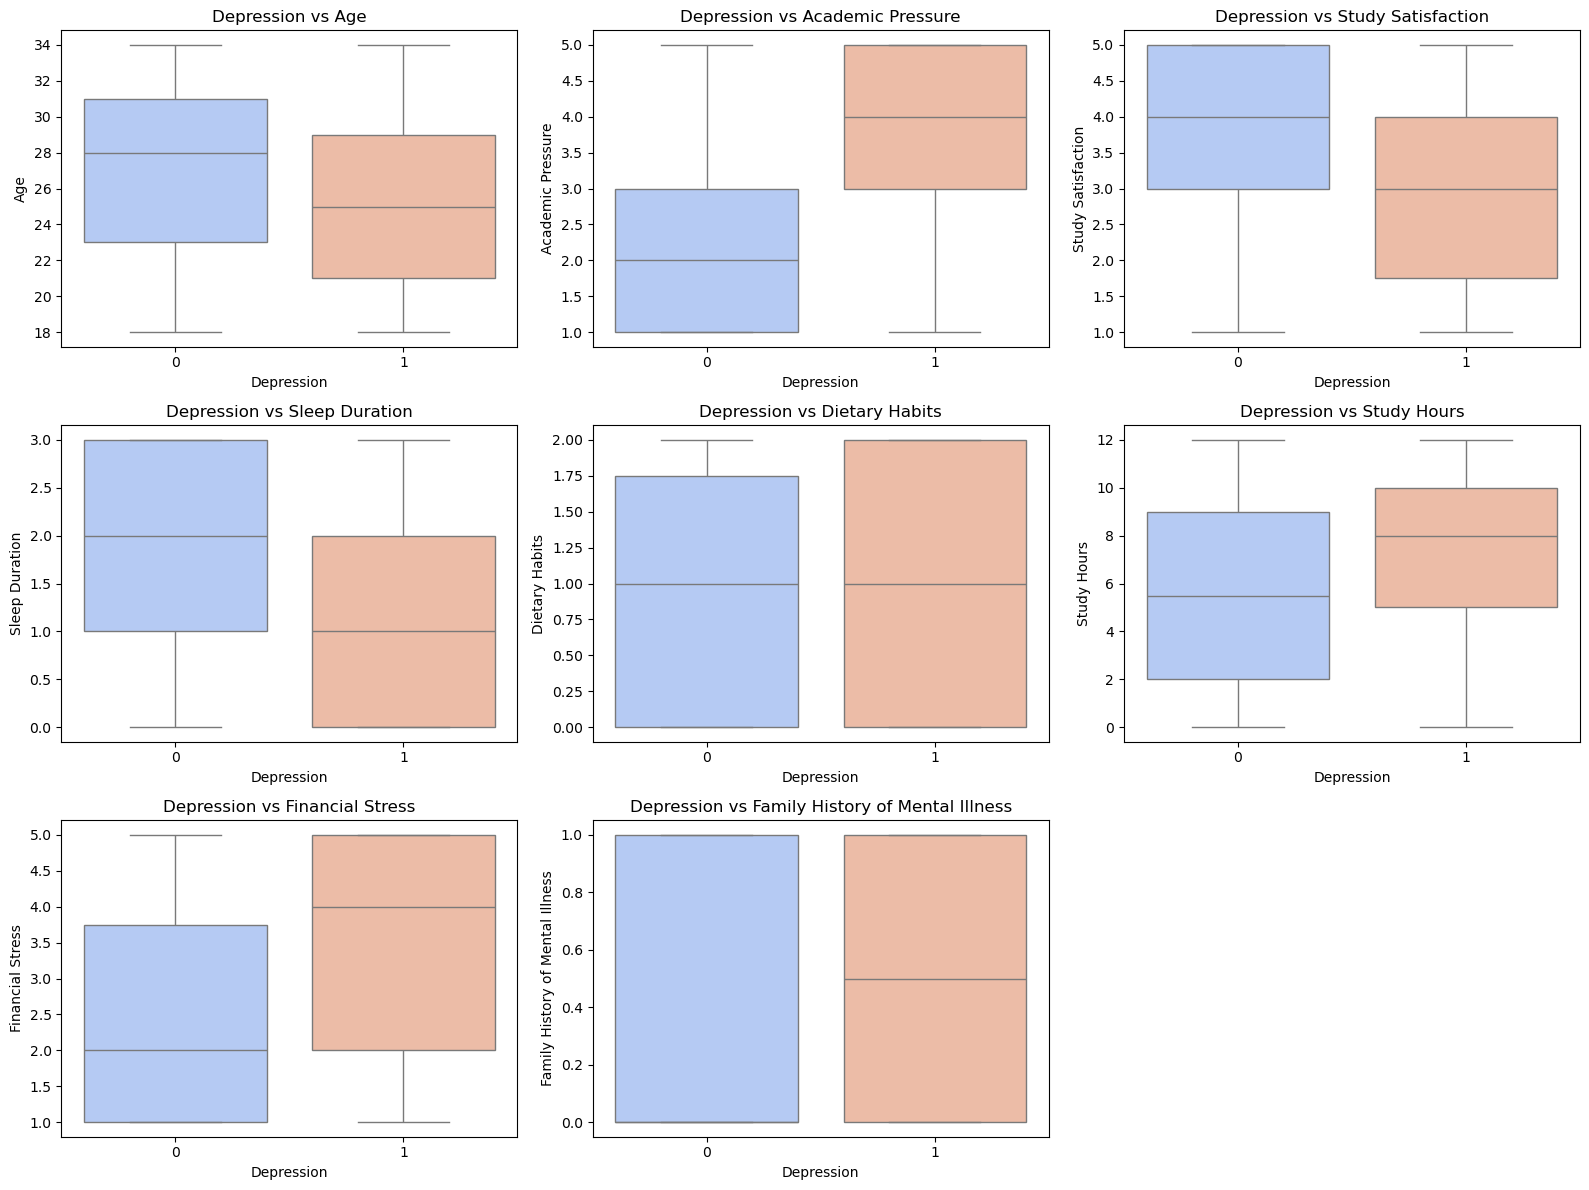

In [6]:
# Remove 'gender' and 'suicidal thought' from the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'gender' and 'suicidal thought' from the features to plot
numerical_features = [feature for feature in numerical_features if feature not in ['Gender', 'Have you ever had suicidal thoughts ?','Depression']]


# Calculate the number of rows and columns for subplots
num_features = len(numerical_features)
cols = 3  # Set a fixed number of columns
rows = np.ceil(num_features / cols).astype(int)

# Create the box plots
plt.figure(figsize=(16, 4 * rows))  # Adjust the figure size dynamically
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)  # Adjust subplot layout
    sns.boxplot(x='Depression', y=feature, data=df, palette='coolwarm')
    plt.title(f'Depression vs {feature}')
plt.tight_layout()
plt.show()

Genderwise Depression

Total count of people with depression: 252
Men with depression: 138
Women with depression: 114


C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\1216461508.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=counts, palette='coolwarm')


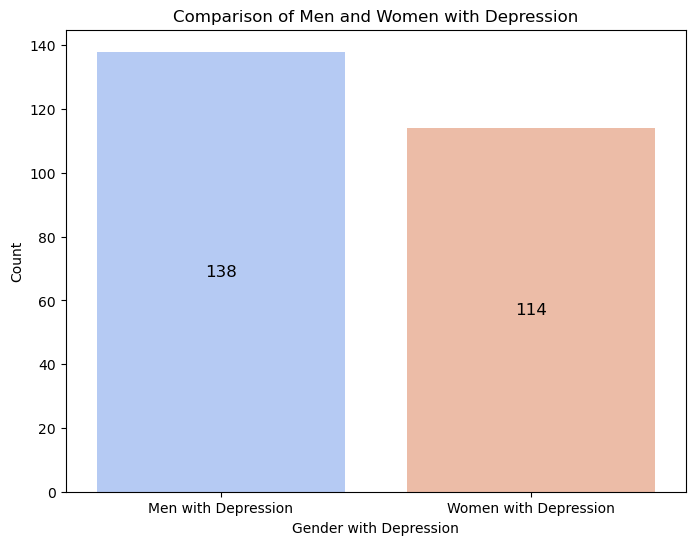

In [7]:
# Get the total count of people with depression
total_depression_count = len(df[df['Depression'] == 1])
# Dataset for men with depression 
men_depression_count = len(df[(df['Gender'] == 1) & (df['Depression'] == 1)])

# Filter the dataset for women with depression
women_depression_count = len(df[(df['Gender'] == 0) & (df['Depression'] == 1)])

# Data for the bar chart
categories = ['Men with Depression', 'Women with Depression']
counts = [men_depression_count, women_depression_count]

print("Total count of people with depression:",total_depression_count)
print("Men with depression:",men_depression_count)
print("Women with depression:",women_depression_count)
# Plotting the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=categories, y=counts, palette='coolwarm')

# Add value annotation on top of the bar (inside the bar)
for i, value in enumerate(counts):
    ax.text(i, value / 2, str(value), ha='center', va='center', fontsize=12, color='black')

# Add labels and title
plt.xlabel('Gender with Depression')
plt.ylabel('Count')
plt.title('Comparison of Men and Women with Depression')
plt.show()

Visualisation for the 2 Most common factors for Depression

Academic Pressure

The effect of Academic Pressure on Depression or the Depressed individuals

Mean age for individuals with academic pressure between 3 and 5: 26


C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\4173056735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Academic Pressure', y='Age', data=filtered_df, palette='coolwarm')


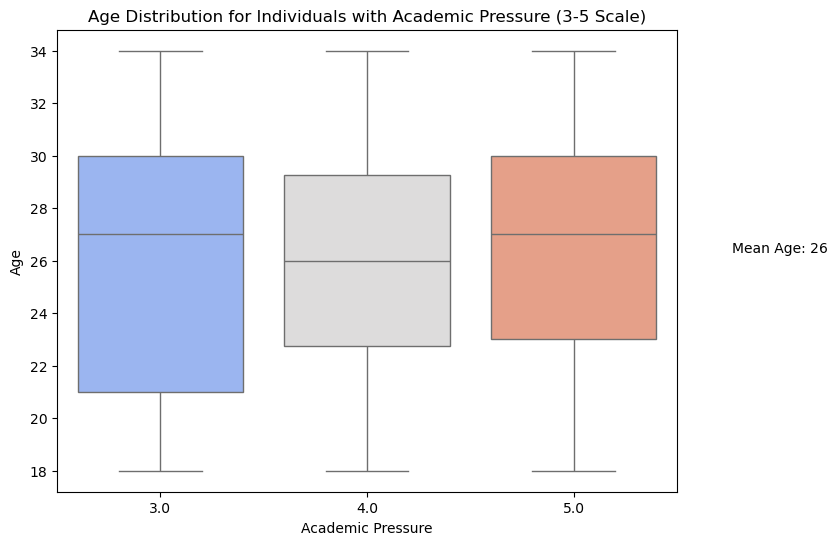

In [8]:
# Filter for individuals with academic pressure between 3 and 5
filtered_df = df[df['Academic Pressure'].between(3, 5)]

# Calculate the mean age for the filtered data
mean_age = filtered_df['Age'].mean()

# Print the mean age
print(f"Mean age for individuals with academic pressure between 3 and 5: {mean_age:.0f}")

# Create a box plot for the distribution of ages among the most academically stressed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Academic Pressure', y='Age', data=filtered_df, palette='coolwarm')

# Add labels and title
plt.xlabel('Academic Pressure')
plt.ylabel('Age')
plt.title('Age Distribution for Individuals with Academic Pressure (3-5 Scale)')

# Annotate the mean age on the plot
plt.text(3, mean_age, f'Mean Age: {mean_age:.0f}', horizontalalignment='center', color='black')

plt.show()


Total Depressed vs Depressed and Academic Pressure

Total Depressed individuals: 252
Number of individuals with academic pressure (3-5 scale) who are depressed: 208


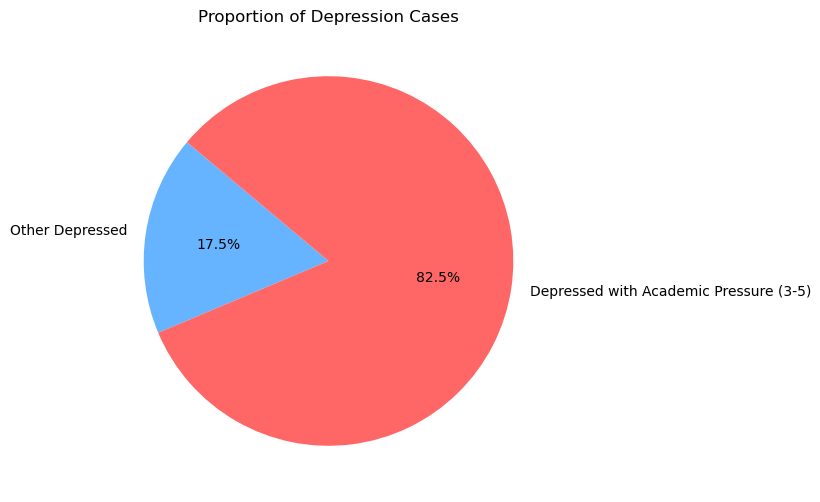

In [9]:
# Filter for individuals with academic pressure between 3 and 5
filtered_df = df[df['Academic Pressure'].between(3, 5)]

# Filter further for individuals who are also depressed (Depression == 1)
depressed_filtered_df = filtered_df[filtered_df['Depression'] == 1]

# Get the total count of depressed individuals in the dataset
total_depression_count = df[df['Depression'] == 1].shape[0]

# Get the count of depressed individuals with academic pressure between 3 and 5
depressed_count = depressed_filtered_df.shape[0]

# Print the results
print("Total Depressed individuals:", total_depression_count)
print(f"Number of individuals with academic pressure (3-5 scale) who are depressed: {depressed_count}")

# Visualization: Pie Chart
plt.figure(figsize=(6, 6))
sizes = [total_depression_count - depressed_count, depressed_count]
labels = ["Other Depressed", "Depressed with Academic Pressure (3-5)"]
colors = ["#66b3ff", "#ff6666"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Depression Cases")
plt.show()

Gender Comparison of Academically affected Depressed


Number of depressed men with academic pressure (3-5 scale): 113
Number of depressed women with academic pressure (3-5 scale): 95


C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\2890452229.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


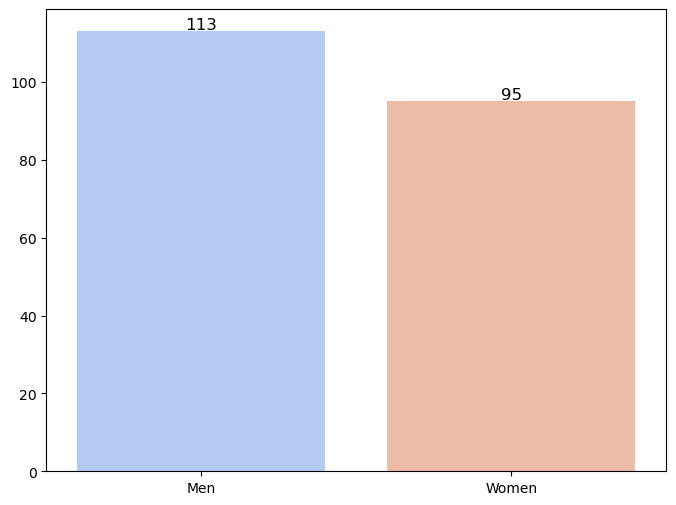

In [28]:
# Filter for individuals with academic pressure between 3 and 5
filtered_df = df[df['Academic Pressure'].between(3,5)]

# Further filter for individuals who are also depressed (Depression == 1)
depressed_filtered_df = filtered_df[filtered_df['Depression'] == 1]

# Count how many depressed individuals are men (Gender == 1) and women (Gender == 0)
depressed_gender_count = depressed_filtered_df['Gender'].value_counts()

# Print the results
print(f"Number of depressed men with academic pressure (3-5 scale): {depressed_gender_count.get(1, 0)}")
print(f"Number of depressed women with academic pressure (3-5 scale): {depressed_gender_count.get(0, 0)}")

# Visualization: Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Men", "Women"],
    y=[depressed_gender_count.get(1, 0), depressed_gender_count.get(0, 0)],
    palette="coolwarm"
)
# Add value labels on top of the bars
for i, value in enumerate([depressed_gender_count.get(1, 0), depressed_gender_count.get(0, 0)]):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12)


Finacial Stress

The effect of Finacial on Depression or the Depressed individuals

Mean age for individuals with financial stress between 3 and 5: 26


C:\Users\DELL\AppData\Local\Temp\ipykernel_12664\3687072614.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Financial Stress', y='Age', data=filtered_df, palette='coolwarm')


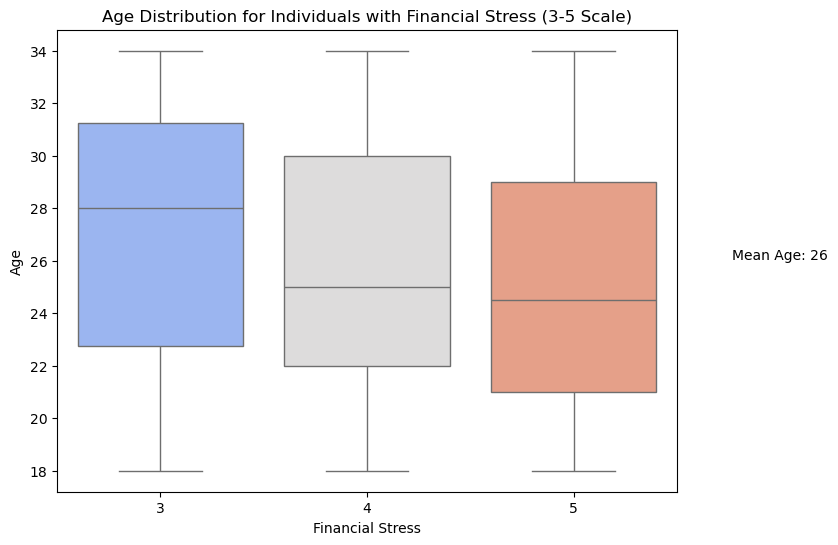

In [11]:
# Filter for individuals with financial stress between 3 and 5
filtered_df = df[df['Financial Stress'].between(3, 5)]

# Calculate the mean age for the filtered data
mean_age = filtered_df['Age'].mean()

# Print the mean age
print(f"Mean age for individuals with financial stress between 3 and 5: {mean_age:.0f}")

# Create a box plot for the distribution of ages among the most financially stressed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Financial Stress', y='Age', data=filtered_df, palette='coolwarm')

# Add labels and title
plt.xlabel('Financial Stress')
plt.ylabel('Age')
plt.title('Age Distribution for Individuals with Financial Stress (3-5 Scale)')

# Annotate the mean age on the plot
plt.text(3,mean_age, f'Mean Age: {mean_age:.0f}', horizontalalignment='center', color='black')

plt.show()

In [12]:
# Filter for individuals with financial stress between 3 and 5
filtered_df = df[df['Financial Stress'].between(3, 5)]

# Filter further for individuals who are also depressed (Depression == 1)
depressed_filtered_df = filtered_df[filtered_df['Depression'] == 1]

# Get the count of depressed individuals
depressed_count = depressed_filtered_df.shape[0]

# Print the result
print("Total Depressed individuals:",total_depression_count)
print(f"Number of individuals with financial stress (3-5 scale) who are depressed: {depressed_count}")


Total Depressed individuals: 252
Number of individuals with financial stress (3-5 scale) who are depressed: 179


In [13]:
# Further filter for individuals who are also depressed (Depression == 1)
depressed_filtered_df = filtered_df[filtered_df['Depression'] == 1]

# Count how many depressed individuals are men (Gender == 1) and women (Gender == 0)
depressed_gender_count = depressed_filtered_df['Gender'].value_counts()

# Print the result
print(f"Number of depressed men with financial stress (3-5 scale): {depressed_gender_count.get(1, 0)}")
print(f"Number of depressed women with financial stress (3-5 scale): {depressed_gender_count.get(0, 0)}")

Number of depressed men with financial stress (3-5 scale): 96
Number of depressed women with financial stress (3-5 scale): 83


MLP CLassification

In [14]:

# Data cleaning and preprocessing
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df = df.drop_duplicates()

# Split features (X) and target (y)
x = df.drop(columns=['Depression'])
y = df['Depression']

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# Standardize the data (scaling features)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50, 20), (100, 50), (150, 100)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(MLPClassifier(max_iter=3000, random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100), 'solver': 'sgd'}


In [16]:
# Define and train the perceptron model
perceptron = MLPClassifier(hidden_layer_sizes=(150,100),activation='relu',solver='sgd',max_iter=3000,alpha=0.0001,random_state=42)
perceptron.fit(x_train,y_train)

# Model evaluation
TRaccuracy = perceptron.score(x_train,y_train)
Taccuracy = perceptron.score(x_test,y_test)
y_pred = perceptron.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Testing Accuracy:\n",Taccuracy)
print("--------------------------------------------------------------")
print("Training Accuracy:\n",TRaccuracy)
print("--------------------------------------------------------------")
print("Classification report:\n",cm)
print("--------------------------------------------------------------")
print("Report:\n",report)

Testing Accuracy:
 0.9702970297029703
--------------------------------------------------------------
Training Accuracy:
 0.9825436408977556
--------------------------------------------------------------
Classification report:
 [[45  3]
 [ 0 53]]
--------------------------------------------------------------
Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.95      1.00      0.97        53

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Desicion Tree classification

0.801980198019802
--------------------------------------------------------------
Classification report:
 [[35 13]
 [ 7 46]]
--------------------------------------------------------------
Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78        48
         1.0       0.78      0.87      0.82        53

    accuracy                           0.80       101
   macro avg       0.81      0.80      0.80       101
weighted avg       0.81      0.80      0.80       101



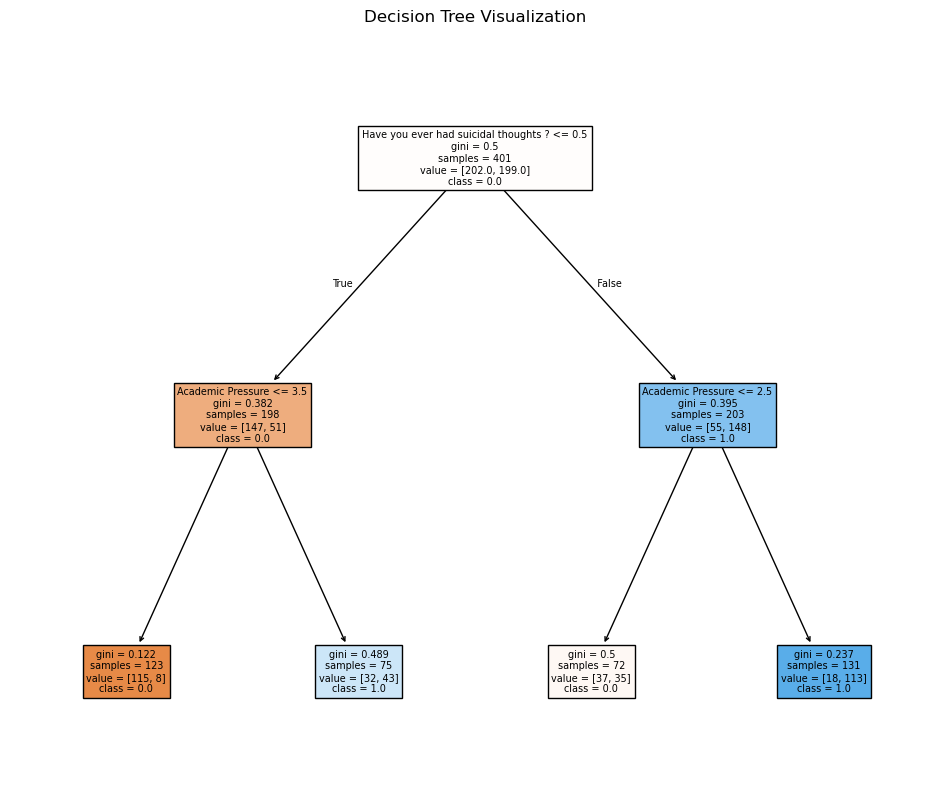

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_train,y_train)

y_pred = tree_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(accuracy)
print("--------------------------------------------------------------")
print("Classification report:\n",cm)
print("--------------------------------------------------------------")
print("Report:\n",report)

# Plot the decision tree
feature_names = x.columns  # Ensure x is a DataFrame to use .columns
class_names = [str(cls) for cls in tree_clf.classes_]  # Convert class names to strings for plotting

plt.figure(figsize=(12, 10))
plot_tree(tree_clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Random Forest

In [18]:

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
   
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

# Display the best parameters found by Grid Search
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}


Accuracy: 0.9306930693069307
--------------------------------------------------------------
Confusion Matrix:
 [[42  6]
 [ 1 52]]
--------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.92        48
         1.0       0.90      0.98      0.94        53

    accuracy                           0.93       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101



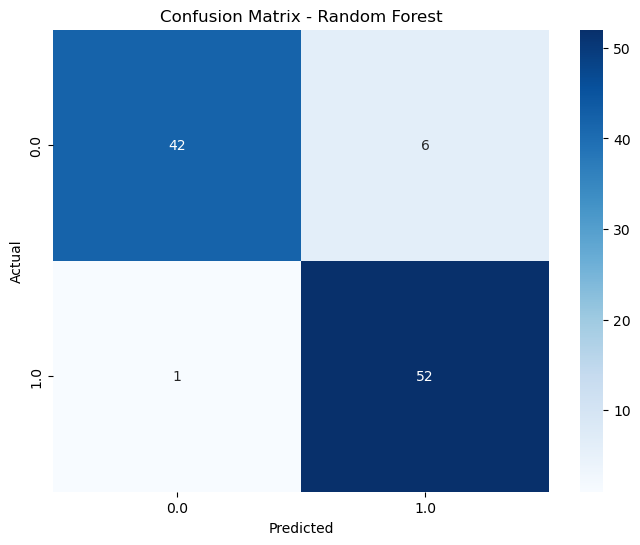

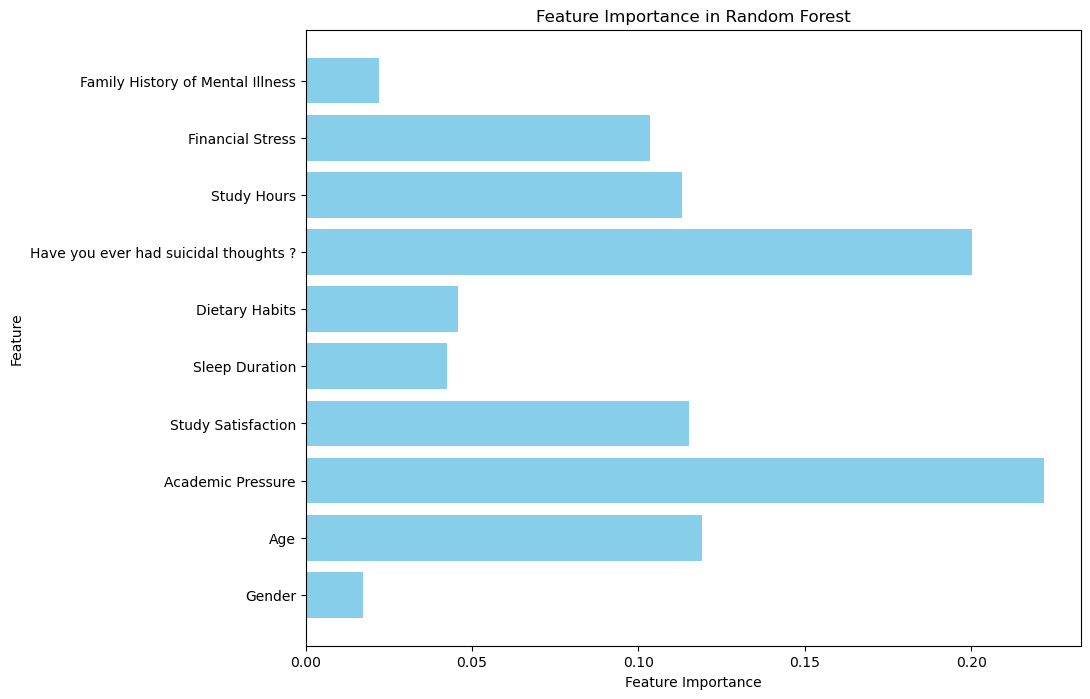

In [19]:

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
rf_clf.fit(x_train, y_train)

# Make predictions
y_pred = rf_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("--------------------------------------------------------------")
print("Confusion Matrix:\n", cm)
print("--------------------------------------------------------------")
print("Classification Report:\n", report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature Importance
feature_importances = rf_clf.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(x.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


SVM 

In [20]:
# Split features (X) and target (y)
x = df.drop(columns=['Depression'])
y = df['Depression']

# Standardize the data (scaling features)
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = svm.SVC(kernel='linear').fit(x_train,y_train)

y_pred = model.predict(x_test)

accuraccy = accuracy_score(y_pred,y_test)
cm = classification_report(y_pred,y_test)

#cross validation on the model
scores = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')

print("all the scores for evry fold:",scores)
print("Mean accuracy:",scores.mean())
print("Accuracy for the model:",accuraccy)
print("Confusion matrix:",cm)

all the scores for evry fold: [0.95061728 0.95       0.95       0.9625     0.975     ]
Mean accuracy: 0.9576234567901235
Accuracy for the model: 0.9801980198019802
Confusion matrix:               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        46
         1.0       1.00      0.96      0.98        55

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [21]:
c = [0.01,0.1,1,10,0.5,2.5]

for cval in c:
    model = svm.SVC(kernel='linear',C=cval).fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuraccy = accuracy_score(y_pred,y_test)
    print(f"When Cval is {cval},the Accuracy for the model is {accuraccy}")

When Cval is 0.01,the Accuracy for the model is 0.9603960396039604
When Cval is 0.1,the Accuracy for the model is 0.9504950495049505
When Cval is 1,the Accuracy for the model is 0.9801980198019802
When Cval is 10,the Accuracy for the model is 0.9702970297029703
When Cval is 0.5,the Accuracy for the model is 0.9801980198019802
When Cval is 2.5,the Accuracy for the model is 0.9801980198019802
